<a href="https://colab.research.google.com/github/Rohan-69108/project-1/blob/main/resume_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data set/framingham.csv")
df.head(7)#chd=cornonary heart disease

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1


In [ ]:
df.shape


(4240, 16)

<Axes: xlabel='prevalentStroke', ylabel='count'>

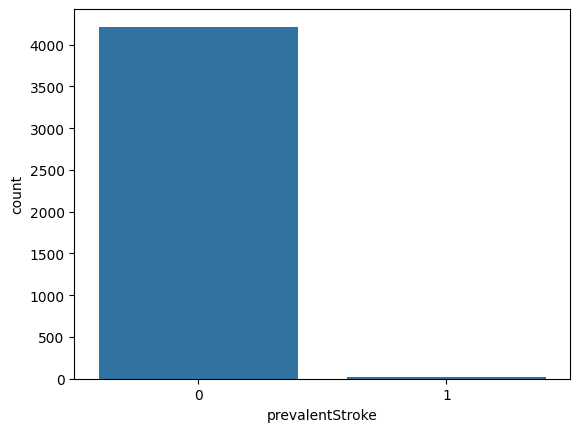

In [ ]:
sns.countplot(x="prevalentStroke",data=df)#around 4000 people dont have prevalent stroke

<Axes: xlabel='prevalentHyp', ylabel='count'>

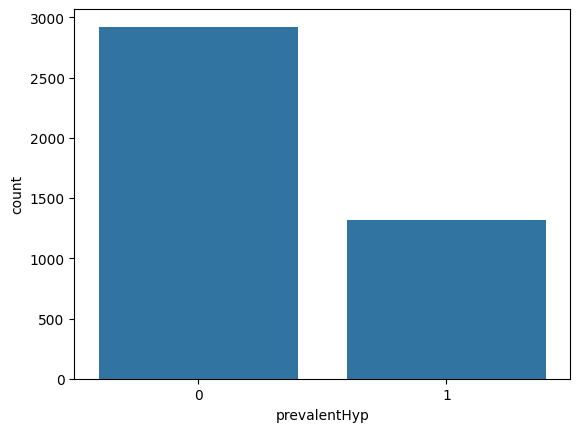

In [ ]:
sns.countplot(x="prevalentHyp", data=df)

<Axes: ylabel='Frequency'>

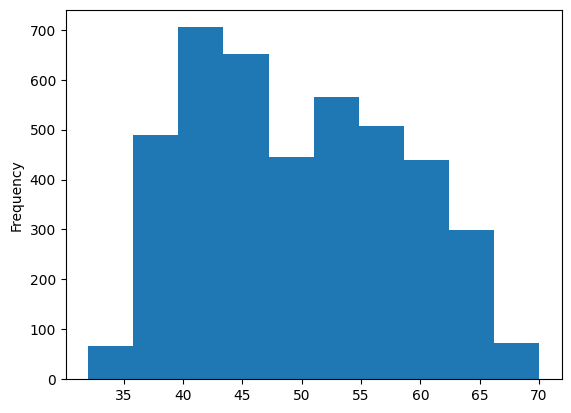

In [ ]:
df["age"].plot.hist()

<Axes: ylabel='Frequency'>

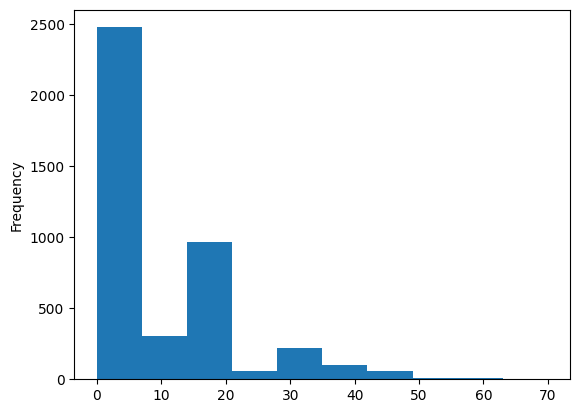

In [ ]:
df["cigsPerDay"].plot.hist()

<Axes: ylabel='Frequency'>

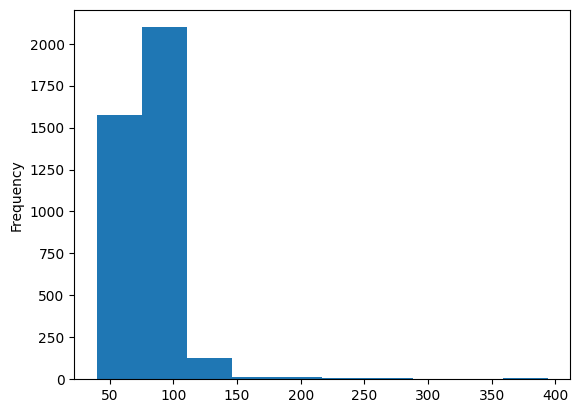

In [ ]:
df["glucose"].plot.hist()

<Axes: xlabel='TenYearCHD', ylabel='count'>

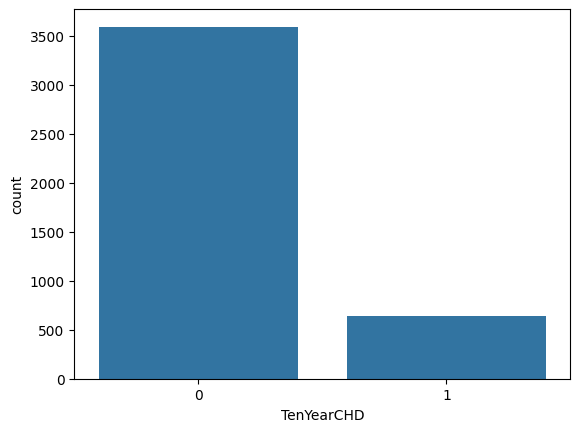

In [ ]:
sns.countplot(x="TenYearCHD", data=df) #more than 500 people has ten year chronic disease

In [ ]:
df.isnull().mean()*100

,0
male,0.000000
age,0.000000
education,2.476415
currentSmoker,0.000000
cigsPerDay,0.683962
BPMeds,1.250000
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,1.179245


<Axes: >

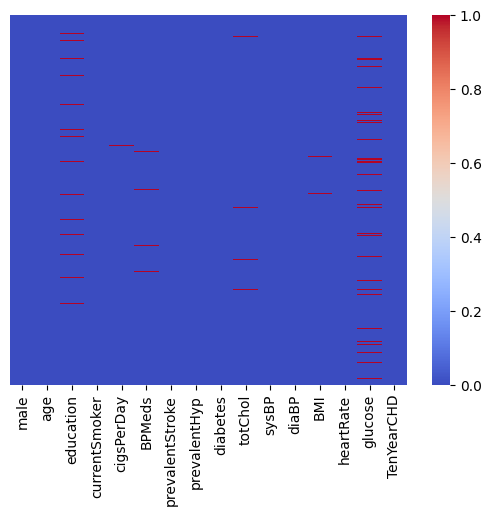

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="coolwarm")

In [ ]:
#education is not a issue in heart disease,so we can drop that column

In [ ]:
df.drop("education",axis=1,inplace=True)

In [ ]:
df.head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#HANDLING MISSING DATA


In [ ]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.02 and df[var].isnull().mean()>0]
cols

['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

In [ ]:
len(df[cols].dropna())/len(df) #we can drop na values from cols as we still have 96% data

0.964622641509434

In [ ]:
df1=df[cols].dropna()
df1.head(6)

,cigsPerDay,BPMeds,totChol,BMI,heartRate
0,0.0,0.0,195.0,26.97,80.0
1,0.0,0.0,250.0,28.73,95.0
2,20.0,0.0,245.0,25.34,75.0
3,30.0,0.0,225.0,28.58,65.0
4,23.0,0.0,285.0,23.10,85.0
5,0.0,0.0,228.0,30.30,77.0


In [ ]:
df.shape , df1.shape

((4240, 15), (4090, 5))

array([[<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'heartRate'}>, <Axes: >]], dtype=object)

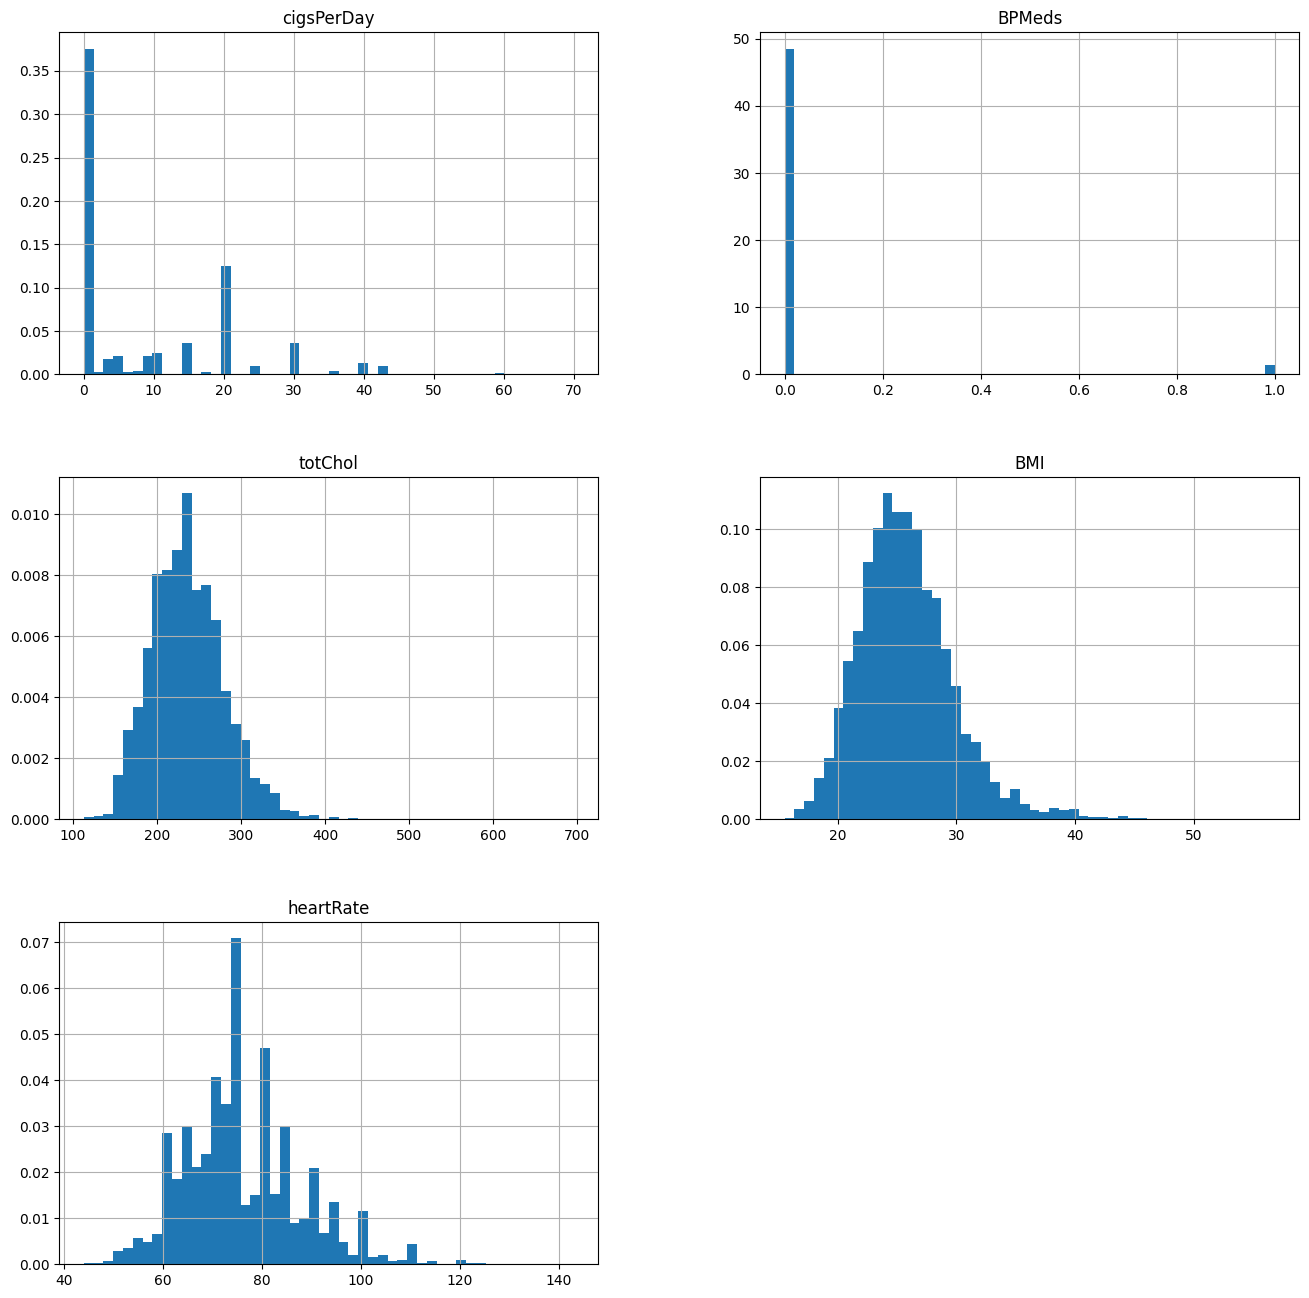

In [ ]:
df1.hist(bins=50,density=True,figsize=(16,16))

<Axes: ylabel='Density'>

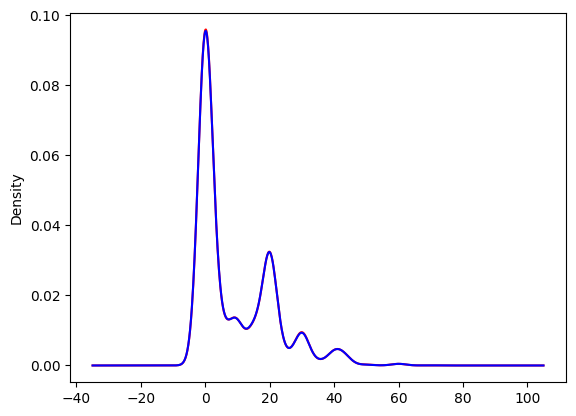

In [ ]:
fig=plt.figure()
x=fig.add_subplot(111)
df["cigsPerDay"].plot.density(color="red")
df1["cigsPerDay"].plot.density(color="blue")#completely overlap each other so exclude null values is a great decision

<Axes: ylabel='Density'>

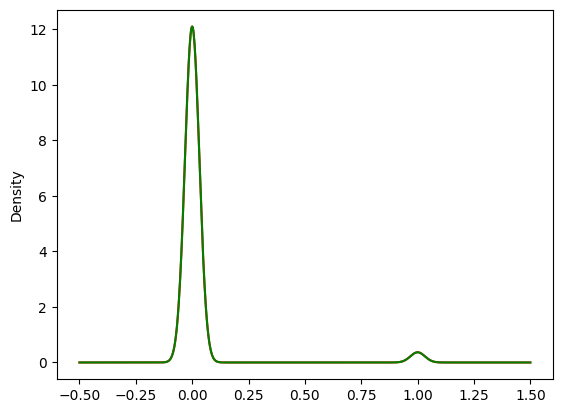

In [ ]:
fig=plt.figure()
x=fig.add_subplot(111)
df["BPMeds"].plot.density(color="red")
df1["BPMeds"].plot.density(color="green")

<Axes: ylabel='Density'>

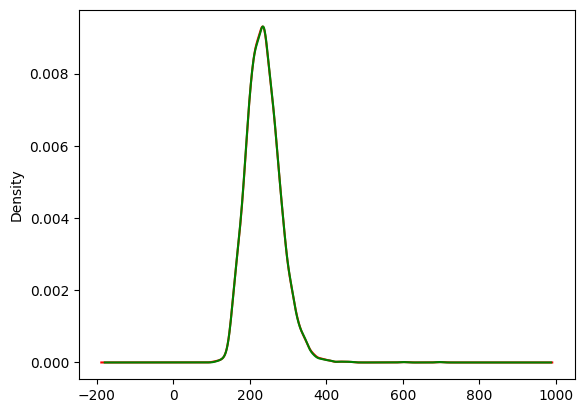

In [ ]:
fig=plt.figure()
x=fig.add_subplot(111)
df["totChol"].plot.density(color="red")
df1["totChol"].plot.density(color="green")

<Axes: ylabel='Density'>

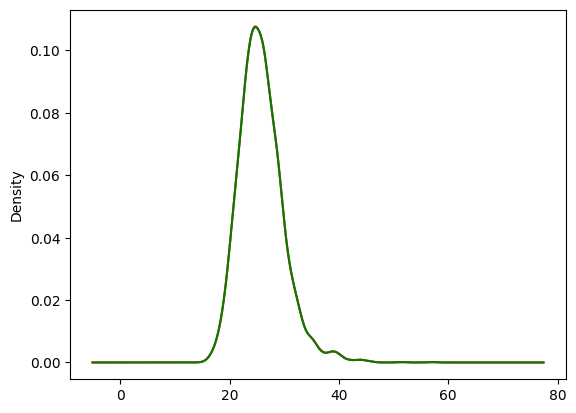

In [ ]:
fig=plt.figure()
x=fig.add_subplot(111)
df["BMI"].plot.density(color="red")
df1["BMI"].plot.density(color="green")

<Axes: ylabel='Density'>

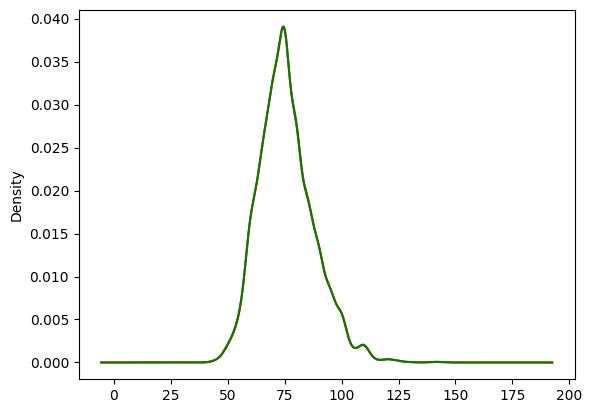

In [ ]:
fig=plt.figure()
x=fig.add_subplot(111)
df["heartRate"].plot.density(color="red")
df1["heartRate"].plot.density(color="green")

In [ ]:
df.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df1.columns

Index(['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate'], dtype='object')

In [ ]:
for col in df.columns:
  if col not in df1.columns:
    df1[col] = df[col]

In [ ]:
df1.head(5)

,cigsPerDay,BPMeds,totChol,BMI,heartRate,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,glucose,TenYearCHD
0,0.0,0.0,195.0,26.97,80.0,1,39,0,0,0,0,106.0,70.0,77.0,0
1,0.0,0.0,250.0,28.73,95.0,0,46,0,0,0,0,121.0,81.0,76.0,0
2,20.0,0.0,245.0,25.34,75.0,1,48,1,0,0,0,127.5,80.0,70.0,0
3,30.0,0.0,225.0,28.58,65.0,0,61,1,0,1,0,150.0,95.0,103.0,1
4,23.0,0.0,285.0,23.10,85.0,0,46,1,0,0,0,130.0,84.0,85.0,0


In [ ]:
df1.isnull().mean()*100

,0
cigsPerDay,0.000000
BPMeds,0.000000
totChol,0.000000
BMI,0.000000
heartRate,0.000000
male,0.000000
age,0.000000
currentSmoker,0.000000
prevalentStroke,0.000000
prevalentHyp,0.000000


In [ ]:
m=df1["glucose"].mean()
m

81.88003199146894

In [ ]:
me=df1["glucose"].median()
me

78.0

In [ ]:
df1["glucose mean"]=df1["glucose"].fillna(m)
df1["glucose median"]=df1["glucose"].fillna(me)

In [ ]:
df1.head(5)

,cigsPerDay,BPMeds,totChol,BMI,heartRate,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,glucose,TenYearCHD,glucose mean,glucose median
0,0.0,0.0,195.0,26.97,80.0,1,39,0,0,0,0,106.0,70.0,77.0,0,77.0,77.0
1,0.0,0.0,250.0,28.73,95.0,0,46,0,0,0,0,121.0,81.0,76.0,0,76.0,76.0
2,20.0,0.0,245.0,25.34,75.0,1,48,1,0,0,0,127.5,80.0,70.0,0,70.0,70.0
3,30.0,0.0,225.0,28.58,65.0,0,61,1,0,1,0,150.0,95.0,103.0,1,103.0,103.0
4,23.0,0.0,285.0,23.10,85.0,0,46,1,0,0,0,130.0,84.0,85.0,0,85.0,85.0


In [ ]:
print("original glucose variable variance",df1["glucose"].var())
print("new glucose mean variable variance",df1["glucose mean"].var())
print("new glucose median variable variance",df1["glucose median"].var())

original glucose variable variance 570.3610705056429
new glucose mean variable variance 523.0750830022404
new glucose median variable variance 524.2197441881464


In [ ]:
#for median the varience is more close to original so we use median to fill na

In [ ]:
df1.drop("glucose mean",axis=1,inplace=True)
df1.drop("glucose median",axis=1,inplace=True)

In [ ]:
df1.head(5)

,cigsPerDay,BPMeds,totChol,BMI,heartRate,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,glucose,TenYearCHD
0,0.0,0.0,195.0,26.97,80.0,1,39,0,0,0,0,106.0,70.0,77.0,0
1,0.0,0.0,250.0,28.73,95.0,0,46,0,0,0,0,121.0,81.0,76.0,0
2,20.0,0.0,245.0,25.34,75.0,1,48,1,0,0,0,127.5,80.0,70.0,0
3,30.0,0.0,225.0,28.58,65.0,0,61,1,0,1,0,150.0,95.0,103.0,1
4,23.0,0.0,285.0,23.10,85.0,0,46,1,0,0,0,130.0,84.0,85.0,0


In [ ]:
df1["glucose"].replace(to_replace = np.nan, value = me, inplace=True)

<Axes: >

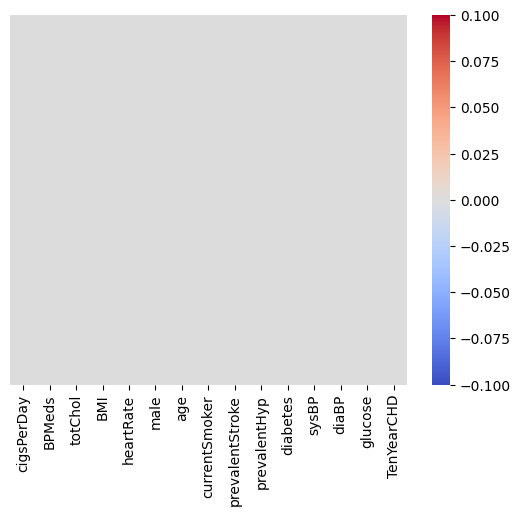

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap="coolwarm")

<Axes: >

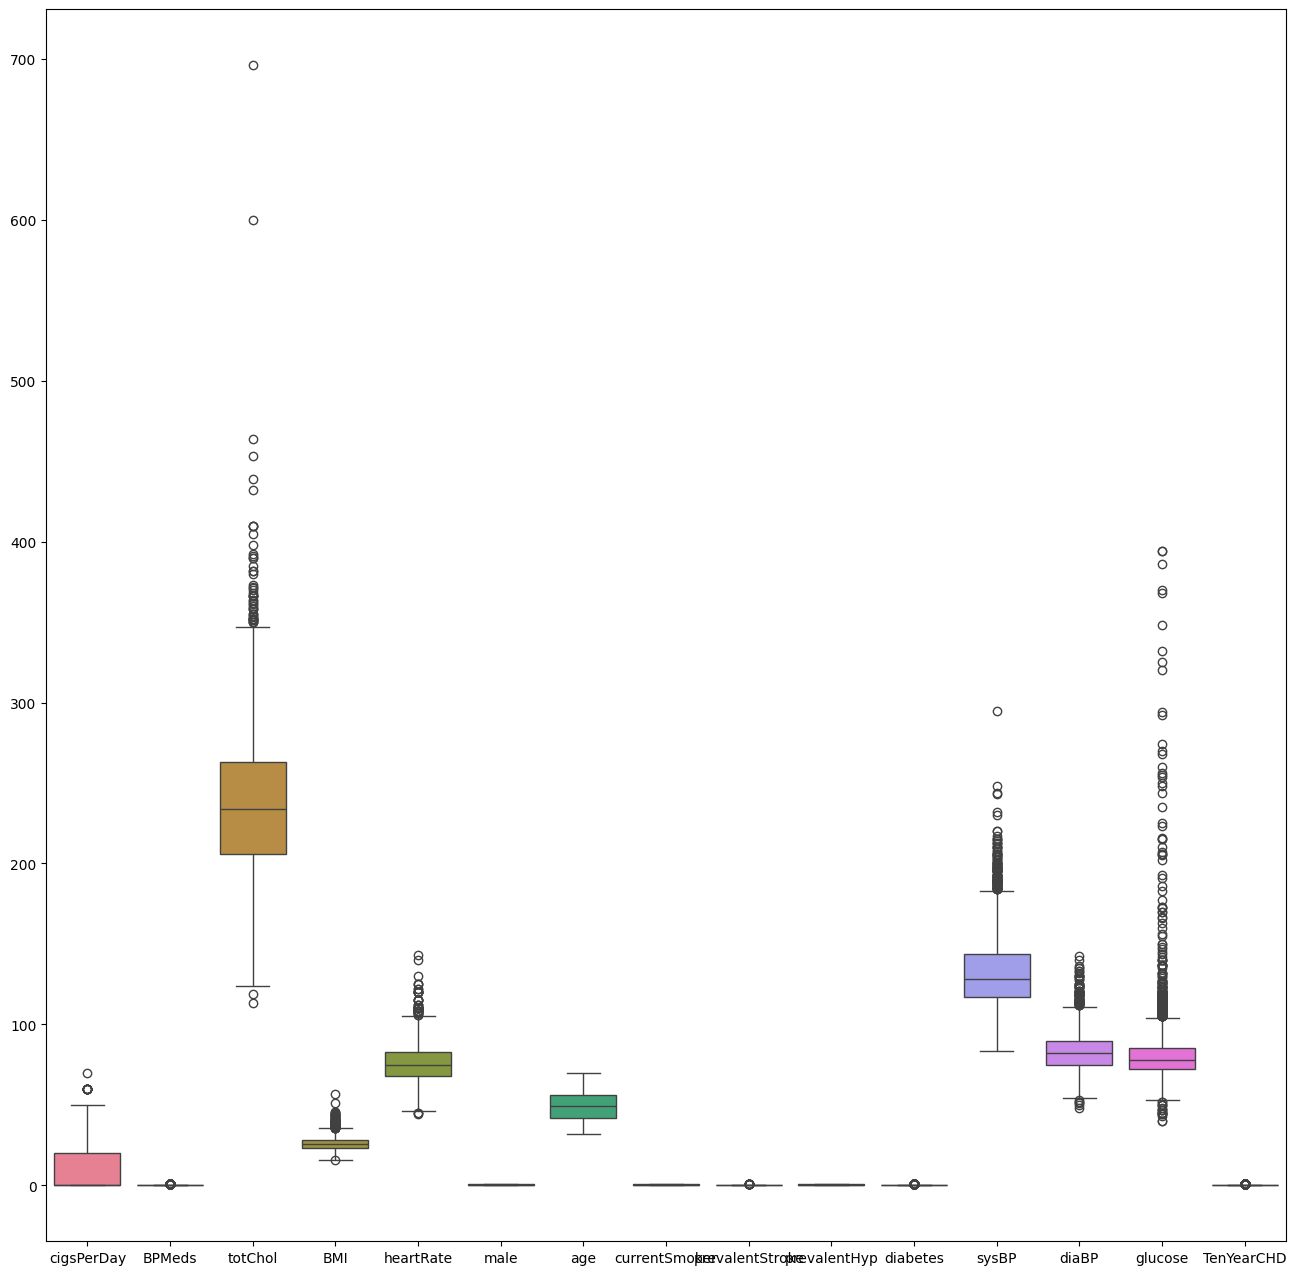

In [ ]:
plt.figure(figsize=(16,16))
sns.boxplot(data=df1)

In [ ]:
df1["BMI"].max()   ,  df1["glucose"].max()

(56.8, 394.0)

In [ ]:
X=df1.drop("TenYearCHD",axis=1)
y=df1["TenYearCHD"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=15)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8508557457212714
Precision Score : 0.375
Recall Score : 0.025
F1 Score : 0.046875
Confusion Matrix : 
[[693   5]
 [117   3]]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8508557457212714